In [1]:
flex_title = "B-Solutions"
flex_orientation = "rows"
flex_subtitle = "Sales Dashboard Analysis"
flex_source_link = ""
flex_include_source = True

# Sales General Information

## Row 1

### Sales general description: 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import date_range
from bqplot import *
%matplotlib inline

In [3]:
class Data_Generator_Sales:
    def __init__(self, size_sample=15):
        self.size_sample = size_sample
    def store_id_fun(self, product_start, product_end):
        product_id = np.random.randint(product_start, product_end, self.size_sample)
        yield product_id      
    def order_date_id_fun(self):
        for _ in range(self.size_sample):
            date = pd.to_datetime(np.random.choice(pd.bdate_range('2021-01-01', '2021-03-31')))
            yield date
    def counstomers_qunatity_fun(self, product_start, product_end):
        coustomers_qun_id = np.random.randint(product_start, product_end, self.size_sample)
        yield coustomers_qun_id
    def product_id_fun(self, product_start, product_end):
        product_id = np.random.randint(product_start, product_end, self.size_sample)
        yield product_id
    def price_id_fun(self, price_start, price_end):
        price_id = np.random.randint(price_start, price_end, self.size_sample)
        yield price_id
    def qunatity_id_fun(self, qunatity_start, qunatity_end):
        qunatity_id = np.random.randint(1, 25, self.size_sample)
        yield qunatity_id
    def promo_data(self, product_start, product_end):
        product_id = np.random.randint(product_start, product_end, self.size_sample)
        yield product_id

def generate_sales_data():
    data_generator_sales = Data_Generator_Sales(2000)

    generate_data_store = data_generator_sales.store_id_fun(1, 45)
    data_store = pd.DataFrame(next(generate_data_store), columns=['store_id'])

    generate_date_store_type = data_generator_sales.order_date_id_fun()
    date_store_type = pd.DataFrame(generate_date_store_type, columns=['date_purchase'])

    customer_qunatity = data_generator_sales.counstomers_qunatity_fun(1, 80)
    data_customer = pd.DataFrame(next(customer_qunatity), columns=['customers_quntity'])

    generate_data_product = data_generator_sales.product_id_fun(1, 150)
    data_product = pd.DataFrame(next(generate_data_product), columns=['product_id'])

    generate_data_price_unit = data_generator_sales.price_id_fun(10, 452)
    data_price = pd.DataFrame(next(generate_data_price_unit), columns=['price_unit'])

    generate_data_quantity = data_generator_sales.qunatity_id_fun(0, 50)
    data_quantity = pd.DataFrame(next(generate_data_quantity), columns=['quantity'])

    generate_data_promos_apply = data_generator_sales.promo_data(0, 1)
    data_promo = pd.DataFrame(next(generate_data_promos_apply), columns=['promos_apply'])

    merge_data = pd.concat([data_store, date_store_type, data_customer, data_product, data_price, data_quantity, data_promo], axis=1)
    merge_data['total'] = merge_data.quantity * merge_data.price_unit
    return merge_data

generate_data_sales = generate_sales_data()

def convert_dataItime_date():

    generate_data_sales['date_purchase'] = pd.to_datetime(generate_data_sales['date_purchase'])

    generate_data_sales['months_name'] = generate_data_sales['date_purchase'].dt.month_name()

    generate_data_sales['year'] = generate_data_sales['date_purchase'].dt.year

    generate_data_sales['year'] = pd.DatetimeIndex(generate_data_sales['date_purchase']).year

    generate_data_sales['month'] = pd.DatetimeIndex(generate_data_sales['date_purchase']).month

    generate_data_sales['day'] = pd.DatetimeIndex(generate_data_sales['date_purchase']).day

    generate_data_sales['week_day'] = pd.DatetimeIndex(generate_data_sales['date_purchase']).weekday

    return generate_data_sales

generate_data_sales = convert_dataItime_date()

In [4]:
class Sales_General_Manipulation:
    def __init__(self, data_sales):
        self.data_sales = data_sales
    def per_month_sales(self, data_months):
        data_months = data_months.groupby(['month', 'months_name'])['total'].sum()
        return 'Sales Per Month Information: \n {} \n'.format(data_months)
    def head_sales(self):
        data_head = self.data_sales.head()
        return 'Sales Table (first 5 rows): \n {} \n'.format(data_head)
    def per_year_sales(self, data_years):
        data_years = data_years.groupby(['year'])['total'].sum()
        return 'Sales Per Year Information: \n {} '.format(data_years)
    def general_sales_store_information(self, sales_describe):
        sales_describe = sales_describe.describe()
        return 'Sales Data General Information: \n {} \n  '.format(sales_describe)
    def check_for_null_values_sales(self, sales_describe):
        sales_describe = sales_describe[pd.isnull(sales_describe)].sum()
        return 'Sales Data General Nan Count Values (0 Nan Vales): \n {} \n '.format(self.data_sales)
    def shape_of_data(self):
        self.data_sales = self.data_sales.shape
        return 'Shape / Size Sales Data: \n {} \n'.format(self.data_sales)

general_manipulation_data = Sales_General_Manipulation(generate_data_sales)
display_head = general_manipulation_data.head_sales()
shape_data = general_manipulation_data.shape_of_data()
general_descrbie_data = general_manipulation_data.general_sales_store_information(generate_data_sales)
general_nan_count_values = general_manipulation_data.check_for_null_values_sales(generate_data_sales)
sales_per_month_all_months = general_manipulation_data.per_month_sales(generate_data_sales)
sales_per_year = general_manipulation_data.per_year_sales(generate_data_sales)

In [5]:
generate_data_sales[['months_name', 'total']].groupby('months_name').agg(('sum', 'count'))


total      
                 sum count
months_name               
February     1775859   639
January      1967582   657
March        2100346   704

In [6]:
generate_data_sales[['months_name', 'total']].groupby('months_name').agg(('max', 'median', 'min', 'mean'))

total                        
               max median min         mean
months_name                               
February     10680   2072  15  2779.122066
January      10680   2262  24  2994.797565
March        10632   2220  18  2983.446023

### Sales 2021

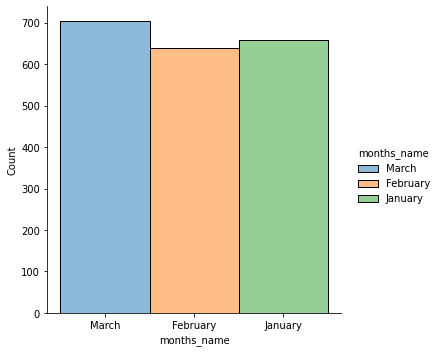

In [7]:
sns.displot(x='months_name', hue='months_name', data=generate_data_sales)
plt.show()


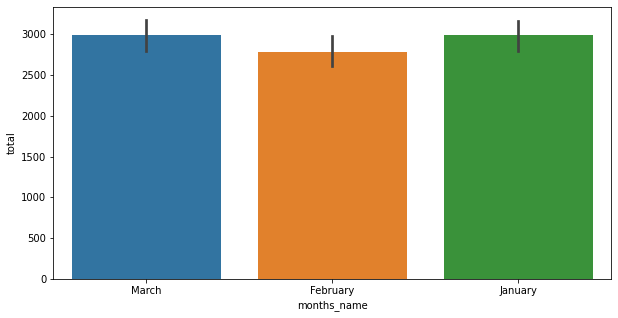

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'months_name', y='total', data = generate_data_sales)
plt.show()

# Time Line Sales by Day

## Sales General Resume by Day 

In [9]:
generate_data_sales[['day', 'total']].groupby('day').agg(('sum', 'max', 'median', 'min', 'mean', 'count'))

total                                       
        sum    max  median  min         mean count
day                                               
1    319610  10680  2717.5   90  3400.106383    94
2    182398  10584  1954.5   20  2849.968750    64
3    119658  10005  2121.0   36  3148.894737    38
4    252253  10488  2223.0   40  2834.303371    89
5    210792   9085  1947.0   90  2509.428571    84
6     77034   7413  2216.5  204  2751.214286    28
7     68931   8136  1892.5   60  3133.227273    22
8    262073  10512  2120.0   93  2817.989247    93
9    212075   9048  2446.0  117  2945.486111    72
10   153733   8257  2265.0   15  2795.145455    55
11   216714  10080  2567.0   44  3009.916667    72
12   333700  10224  2394.0   24  3118.691589   107
13   106406  10680  2344.0  172  3325.187500    32
14    63100   8421  1843.0   61  2629.166667    24
15   346209   9528  2360.0   21  3235.598131   107
16   209814  10632  2156.0   18  3330.380952    63
17   207612   9456  2456.0  148  3053.117647    68
18   342214   9552  2289.0   76  3001.877193   114
19   281393   8448  2551.5   58  2931.177083    96
20   129467   9812  1820.0  144  3010.860465    43
21   115516  10120  3048.0  177  3300.457143    35
22   318681  10680  2110.0   66  2820.185841   113
23   154900   8717  2044.0   60  2766.071429    56
24   118932   7920  1792.0  142  2332.000000    51
25   277720   9768  1872.0  108  2595.514019   107
26   305260   9600  1953.0  114  2963.689320   103
27   110739   8740  3320.0  100  3818.586207    29
28    64504   8118  1155.0  274  2580.160000    25
29   120608   6354  1762.0   38  2079.448276    58
30    52988   8841  1885.0  415  2207.833333    24
31   108753   9900  2808.5  136  3198.617647    34

## Sales General Resume by day

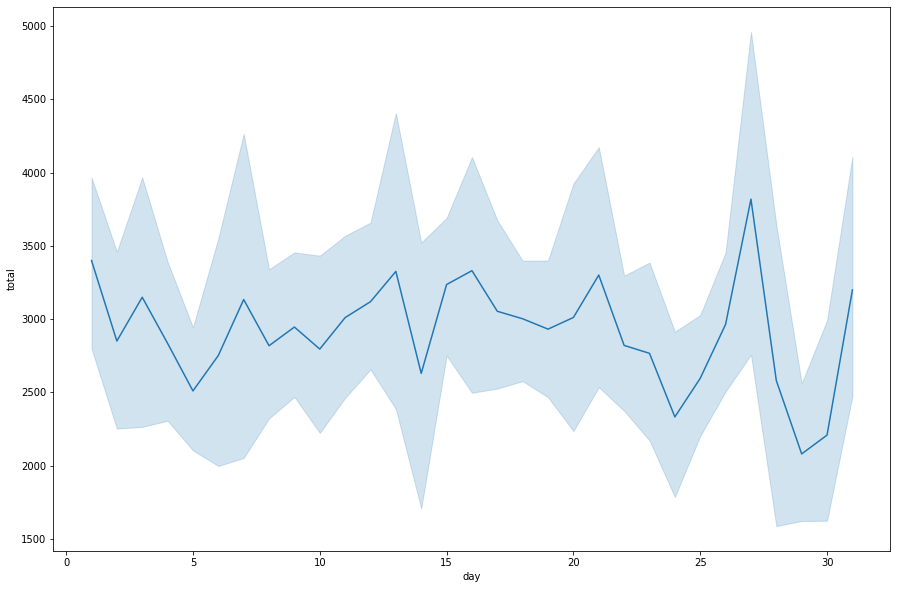

In [10]:
plt.figure(figsize=(15,10))
linetime_plot = sns.lineplot(x='day', y='total', data=generate_data_sales)
plt.show()

# Time Line Sales by Week

## Sales General Resume by Week

In [11]:
generate_data_sales[['week_day', 'total']].groupby('week_day').agg(('sum', 'max', 'median', 'min', 'mean', 'count'))

total                                      
              sum    max  median min         mean count
week_day                                               
0         1112656  10680  2061.0  21  2781.640000   400
1         1162329  10632  2214.0  18  2869.948148   405
2         1132334  10680  2260.5  15  2995.592593   378
3         1087349  10488  2151.5  44  2907.350267   374
4         1349119  10680  2210.0  40  3045.415350   443

## Sales General Resume by Week

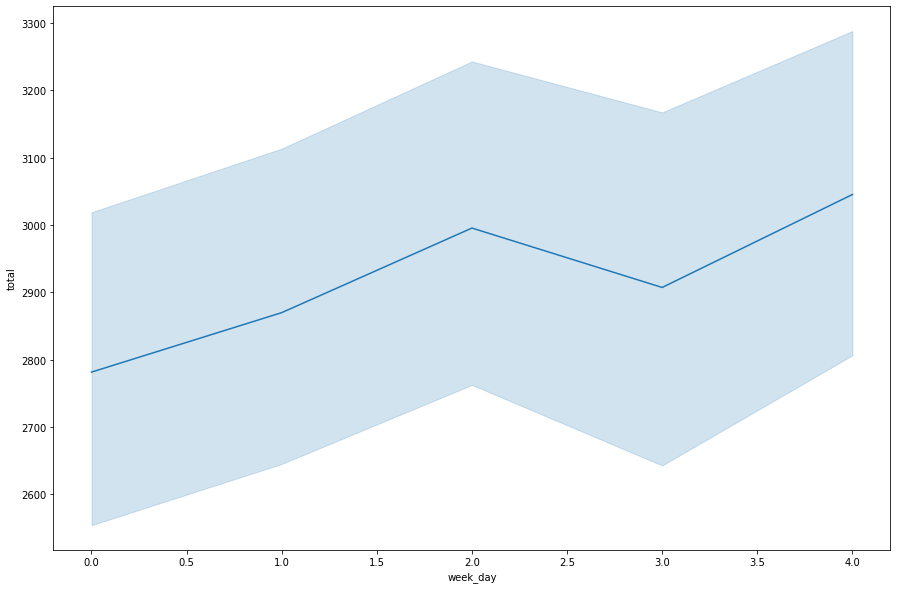

In [12]:
plt.figure(figsize=(15,10))
linetime_plot = sns.lineplot(x='week_day', y='total', data=generate_data_sales)
plt.show()

# Information by Store

## General information by Store

In [13]:
class Data_Generator_Stores:

    def __init__(self, size_sample):
        self.size_sample = size_sample

    def store_id_fun(self, store_start, store_end):
        store_id = np.random.randint(store_start, store_end, self.size_sample)
        yield store_id

    def store_type_id_fun(self, store_type_start, store_type_end):
        store_id_type = np.random.randint(store_type_start, store_type_end, self.size_sample)
        yield store_id_type

    def assortment_data(self, product_start, product_end):
        assortment = np.random.randint(product_start, product_end, self.size_sample)
        yield assortment

    def competition_distance(self, store_type_start, store_type_end):
        compt_distance = np.random.randint(store_type_start, store_type_end, self.size_sample)
        yield compt_distance

    def competition_sice_month(self, store_type_start, store_type_end):
        compt_sice_month = np.random.randint(store_type_start, store_type_end, self.size_sample)
        yield compt_sice_month

    def promo_id(self, store_type_start, store_type_end):
        store_id = np.random.randint(store_type_start, store_type_end, self.size_sample)
        yield store_id

    def promo_week_id(self, store_type_start, store_type_end):
        promo = np.random.randint(store_type_start, store_type_end, self.size_sample)
        yield promo

    def promo_activate(self, store_type_start, store_type_end):
        promo_active = np.random.randint(store_type_start, store_type_end, self.size_sample)
        yield promo_active


def generate_store_data():

    data_generator_store = Data_Generator_Stores(800)

    generate_data_store = data_generator_store.store_id_fun(1, 45)
    data_store = pd.DataFrame(next(generate_data_store), columns=['store_id'])

    generate_data_store_type = data_generator_store.store_type_id_fun(1, 15)
    data_store_type = pd.DataFrame(next(generate_data_store_type), columns=['store_type_id'])

    generate_data_assortment = data_generator_store.assortment_data(1, 10)
    data_assortment = pd.DataFrame(next(generate_data_assortment), columns=['assortment']) 

    generate_data_comentition_distance = data_generator_store.competition_distance(0, 10)
    data_compt_distance = pd.DataFrame(next(generate_data_comentition_distance), columns=['competition_distance'])   

    generate_data_competition_month = data_generator_store.competition_sice_month(0, 10)
    data_compt_month = pd.DataFrame(next(generate_data_competition_month), columns=['competition_since_month'])   

    generate_data_store_promo = data_generator_store.promo_id(0, 15)
    data_store_promo = pd.DataFrame(next(generate_data_store_promo), columns=['promo'])

    generate_data_store_promo_week = data_generator_store.promo_week_id(0, 3)
    data_store_promo_week = pd.DataFrame(next(generate_data_store_promo_week), columns=['promo_week'])

    generate_data_store_promo_activate = data_generator_store.promo_activate(0, 1)
    data_store_promo_activate = pd.DataFrame(next(generate_data_store_promo_activate), columns=['promo_activate'])

    merge_data = pd.concat([data_store, data_store_type, data_assortment,  data_compt_distance, data_compt_month, data_store_promo, data_store_promo_week, data_store_promo_activate], axis=1)

    return merge_data

generate_data_store = generate_store_data()

In [14]:
generate_data_store = generate_store_data()
df_full_data = pd.merge(generate_data_sales, generate_data_store, how='inner', on='store_id')

In [15]:
generate_data_sales[['store_id', 'total']].groupby('total').agg(('sum', 'max', 'median', 'min', 'mean', 'count'))


store_id                                
           sum max median min       mean count
total                                         
15          12  12   12.0  12  12.000000     1
18           8   8    8.0   8   8.000000     1
20          17  17   17.0  17  17.000000     1
21          23  23   23.0  23  23.000000     1
24          15  15   15.0  15  15.000000     1
...        ...  ..    ...  ..        ...   ...
10488       37  37   37.0  37  37.000000     1
10512        1   1    1.0   1   1.000000     1
10584       20  20   20.0  20  20.000000     1
10632        4   4    4.0   4   4.000000     1
10680       64  36   16.0  12  21.333333     3

[1481 rows x 6 columns]

## Col 2

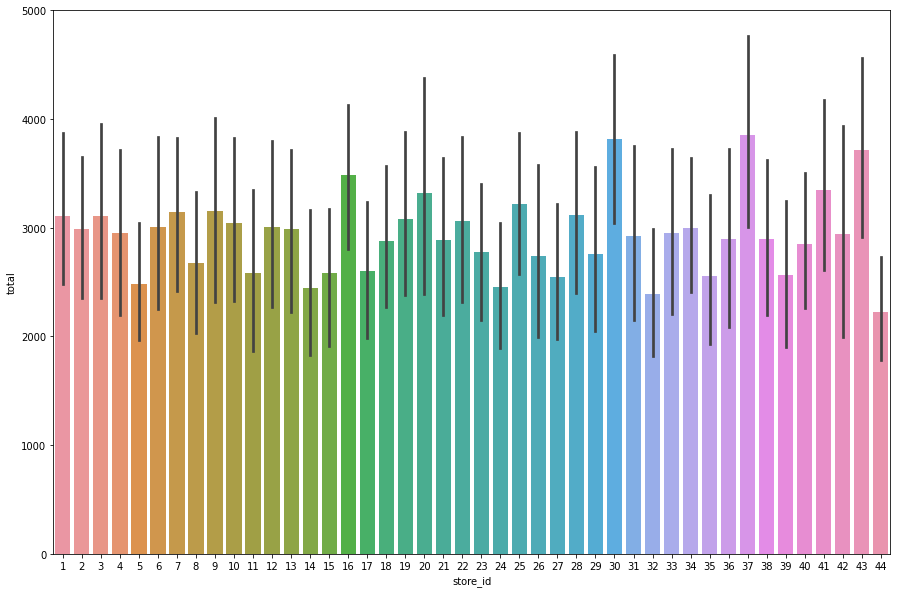

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'store_id' , y = 'total', data = generate_data_sales)
plt.show()